<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/Python/Sesion5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
datos = pd.read_csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/RegresionMultiple.csv")
datos

,Unnamed: 0,Habitantes,Ingresos,Analfabetismo,Esp_Vida,Asesinatos,Universitarios,Heladas,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361
5,Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766
6,Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862
7,Delaware,579,4809,0.9,70.06,6.2,54.6,103,1982
8,Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090
9,Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [ ]:
#Definimos densidad de población = habitantes*1000/area y lo agregamos como una columna más a nuestra data
#renombramos todo esto nuevo como "datos" (se guarda "encima" de lo que existía antes y toma la última actualización de la tabla llamada datos)
datos['Densidad_pobl']=datos['Habitantes'] * 1000 / datos['Area']
datos.head()

,Unnamed: 0,Habitantes,Ingresos,Analfabetismo,Esp_Vida,Asesinatos,Universitarios,Heladas,Area,Densidad_pobl
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644384
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890


In [ ]:
#De la tabla anterior quitamos la primera columna ya que para este análisis no nos será de utilidad.
datos.drop(datos.columns[0],axis=1,inplace=True)
datos.head()

,Habitantes,Ingresos,Analfabetismo,Esp_Vida,Asesinatos,Universitarios,Heladas,Area,Densidad_pobl
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644384
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890


In [ ]:
#Analizamos los coeficientes de correlación para ver posibles colinealidades, utilizando la función
#En este caso utilizamos el método de pearson, pero hay otros que dependiendo de la naturaleza de tus datos, deberás elegir dicho método.
datos.corr(method='pearson')


,Habitantes,Ingresos,Analfabetismo,Esp_Vida,Asesinatos,Universitarios,Heladas,Area,Densidad_pobl
Habitantes,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544,0.246228
Ingresos,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315,0.329968
Analfabetismo,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261,0.009274
Esp_Vida,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332,0.091062
Asesinatos,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390,-0.185035
Universitarios,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542,-0.088367
Heladas,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229,0.002277
Area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000,-0.341389
Densidad_pobl,0.246228,0.329968,0.009274,0.091062,-0.185035,-0.088367,0.002277,-0.341389,1.000000


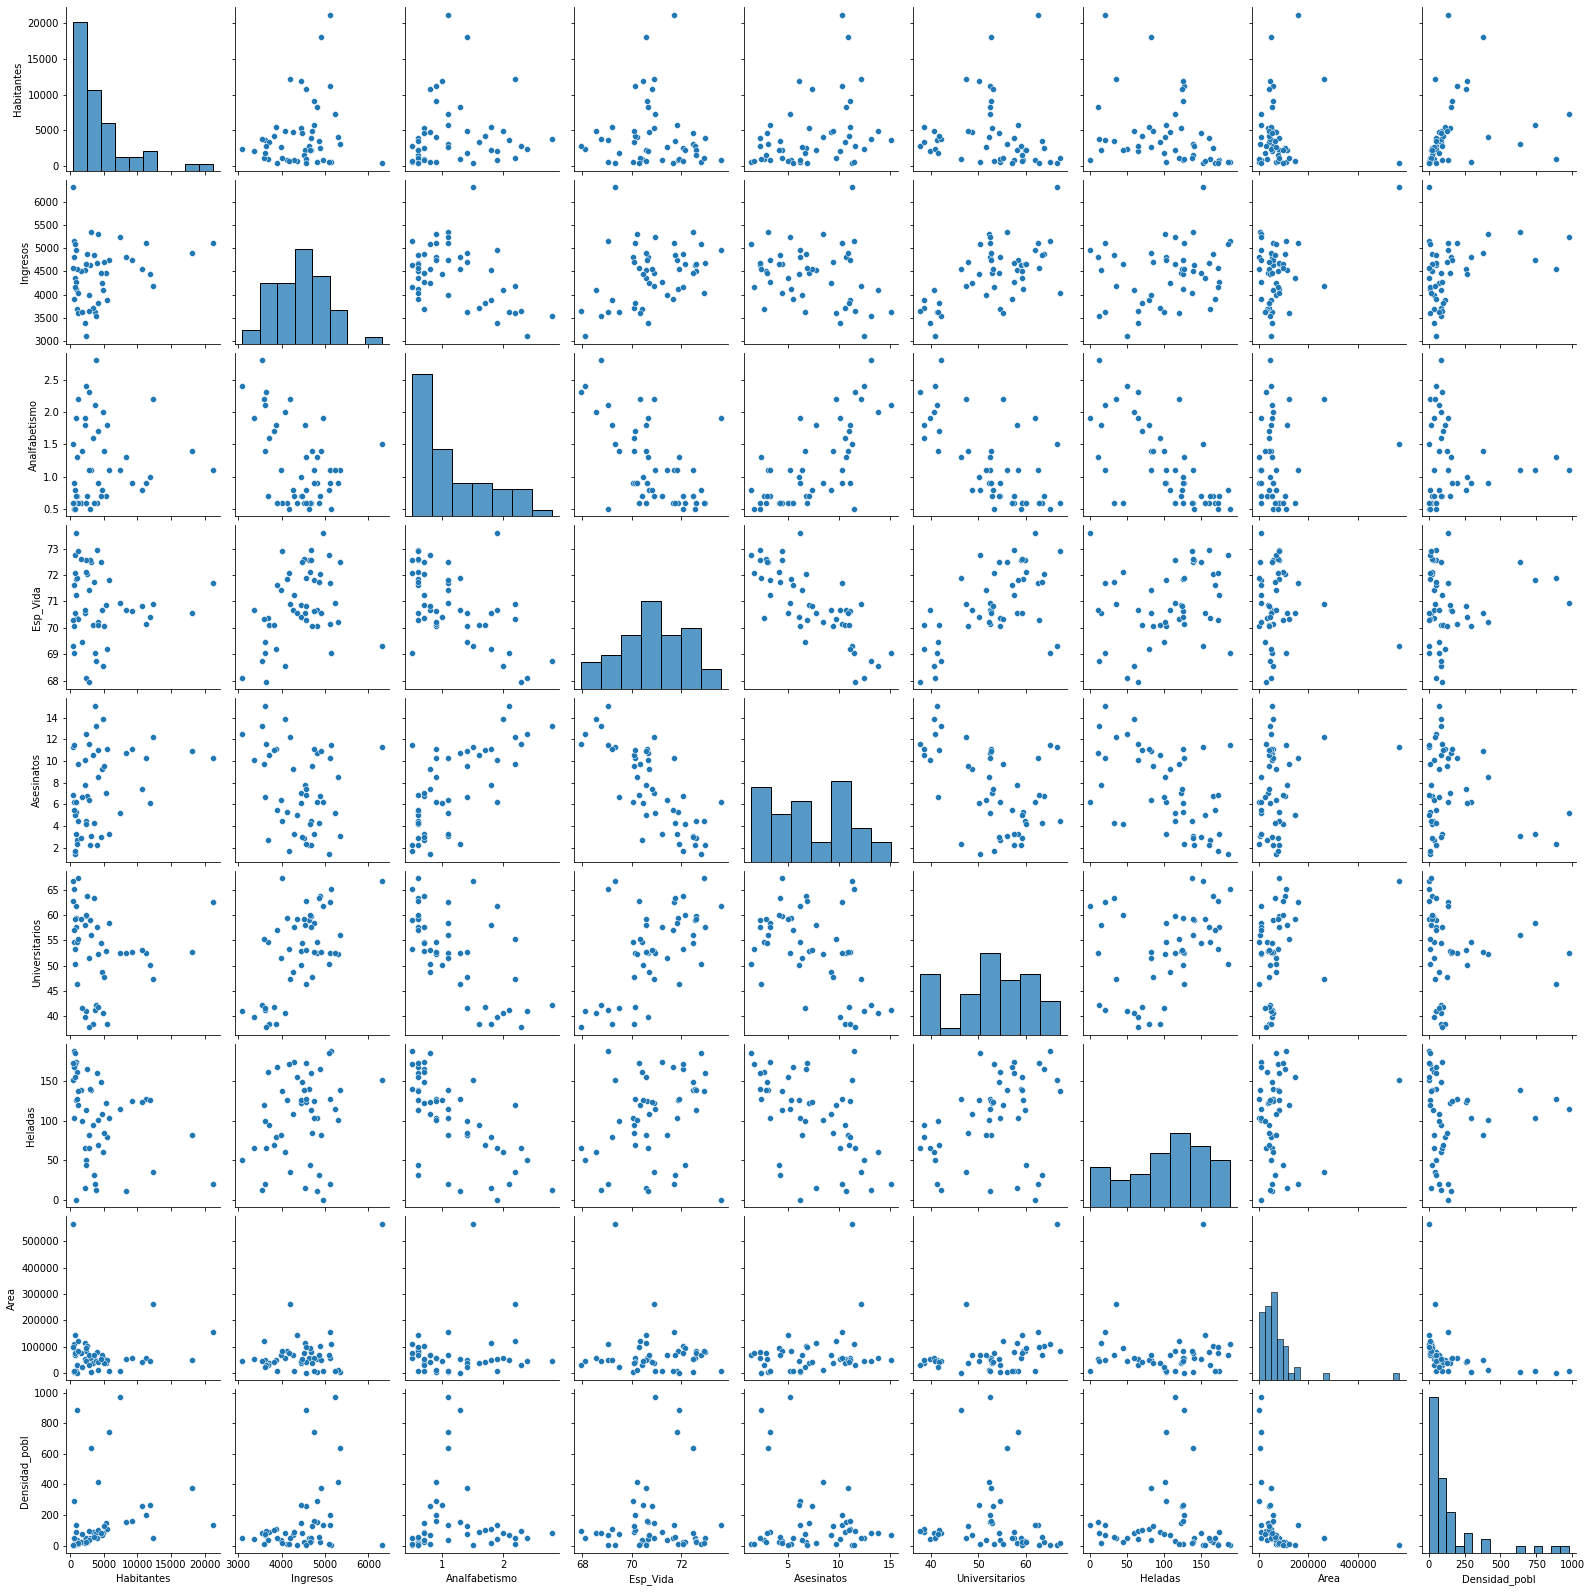

In [ ]:
# Correlaciones básicas
sns.pairplot(datos)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

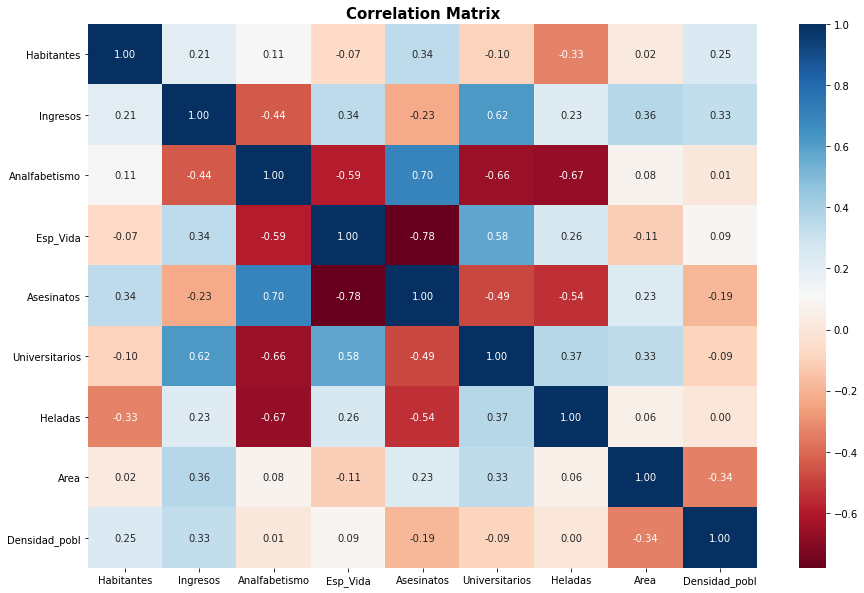

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(datos.corr(), annot=True,  fmt=".2f", cmap='RdBu');
#cor_matrix = datos.corr()
plt.title("Correlation Matrix",size=15, weight='bold')

In [ ]:
#y= variable que intentamos predecir
X= datos[['Habitantes','Ingresos','Analfabetismo', 'Asesinatos',	'Universitarios',	'Heladas',	'Area',	'Densidad_pobl']]
y = datos['Esp_Vida'] 

In [ ]:
#Usando Statsmodel

sm_X_var = sm.add_constant(X)
mlr_model = sm.OLS(y, sm_X_var)
mlr_reg = mlr_model.fit()

In [ ]:
print(mlr_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Esp_Vida   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     15.38
Date:                Thu, 06 May 2021   Prob (F-statistic):           3.79e-10
Time:                        18:25:51   Log-Likelihood:                -50.500
No. Observations:                  50   AIC:                             119.0
Df Residuals:                      41   BIC:                             136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             69.9506      1.843     37.

Ahora usaremos Scikit Learn y mlxtend

In [ ]:
#Usando ScikitLearn
X= datos[['Habitantes','Ingresos','Analfabetismo', 'Asesinatos',	'Universitarios',	'Heladas',	'Area',	'Densidad_pobl']]
y = datos['Esp_Vida'] 

In [ ]:
#Splitting the test and train set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Modelo con scikitLearn
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X, y)
y_pred = mlr.predict(X)

In [ ]:
from sklearn.feature_selection import f_regression
fr=f_regression(X, y, center=True)
print(fr)
#Que es lo que nos da:
#F values of features.
#p-values of F-scores.

(array([ 0.22332551,  6.28474562, 25.42888224, 74.98865153, 24.61457799,
        3.53973023,  0.55941143,  0.40135588]), array([6.38659369e-01, 1.56172816e-02, 6.96925047e-06, 2.26007029e-11,
       9.19609565e-06, 6.59874037e-02, 4.58146418e-01, 5.29397157e-01]))


In [ ]:
from sklearn.feature_selection import f_classif
fc=f_classif(X, y)
print(fc)
#Que es lo que nos da:ANOVA F-value between label/feature for classification tasks.
#F-statistic for each feature
#P-values associated with the F-statistic

(array([0.37117415, 0.7449849 , 3.42679028, 8.6619648 , 2.09853577,
       2.23582979, 6.81183793, 0.632728  ]), array([0.94308221, 0.72771378, 0.16891849, 0.04938814, 0.29983135,
       0.27958622, 0.06878373, 0.79307103]))


In [ ]:
#Exhaustive feature selection for regression analysis con mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs=EFS(mlr, 
        min_features=3,
          max_features=5,
          scoring='neg_mean_squared_error',
          cv=10)
#efs = efs.fit(X_train, y_train)
efs = efs.fit(X, y)
print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)


Features: 182/182


Best subset: (0, 3, 4, 5, 7)


In [ ]:
# Ahora volveremos a ajustar pero basados en el nuevo subset
X2= datos[['Habitantes', 'Asesinatos',	'Universitarios',	'Heladas', 'Densidad_pobl']]
y2 = datos['Esp_Vida'] 

#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [ ]:
# Fit the estimator using the new feature subset
# and make a prediction on the test data
mlr2 = LinearRegression()
mlr2.fit(X2, y2)
#mlr2.fit(X_train2, y_train2)
#y_pred2 = mlr.predict(X_test2)
y_pred2 = mlr2.predict(X2)


In [ ]:
#df = pd.DataFrame({'Actual': y_test, 'Predicción 1': y_pred, 'Predicción 2:': y_pred2})
df = pd.DataFrame({'Actual': y, 'Predicción 1': y_pred, 'Predicción 2:': y_pred2})
df

,Actual,Predicción 1,Predicción 2:
0,69.05,68.359767,68.452172
1,69.31,69.703014,69.780259
2,70.55,71.525085,71.445502
3,70.66,69.544248,69.629629
4,71.71,71.854572,71.902795
5,72.06,71.204294,71.118351
6,72.48,71.964385,71.789776
7,70.06,71.067039,71.015929
8,70.66,70.617806,70.610795
9,68.54,68.695498,68.633915


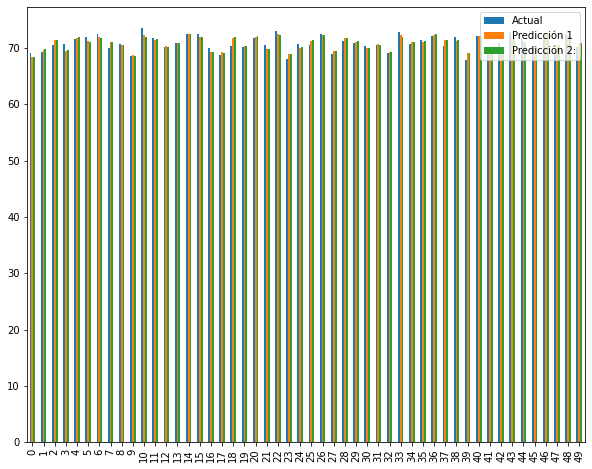

In [ ]:
df.plot(kind='bar',figsize=(10,8))
plt.show()

In [ ]:
r2= r2_score(y, y_pred)
r3=r2_score(y2,y_pred2)
print('R2 score All features:',r2 )
print('R2 score Selected features:',r3 )

R2 score All features: 0.7500726734513088
R2 score Selected features: 0.7435079158807467
